In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics

from urllib.request import urlopen
from urllib.request import Request
import pickle
import gevent.monkey
import re
import html
from collections import Counter
import operator
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree


#Grabbing data downloaded from UC Irvine's dataset repository
data = pd.read_csv("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/OnlineNewsPopularity.csv")


urls = data["url"]
shares = data[" shares"]
titles = []
print(len(urls))

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


39644


In [ ]:
#WEBSITE SCRAPER
#Scrapes titles from each URL in the datset WARNING: Takes hours to run
i = 0
for url in urls:
    try:
        req = Request(url)
        response = urlopen(req)
        page = str(response.read())
        match = re.search('<title>(.*?)</title>', page)
        title = match.group(1) if match else "ERROR"
        fixedTitle = html.unescape(title)
        if(i%500 == 0):
            print(fixedTitle, i)
        i = i + 1
        titles.append(fixedTitle)
    except:
        titles.append("Error")
        
print("ALL DONE")


print("TITLES", titles)
print(len(titles))

with open("titles", 'wb') as f:
    pickle.dump(titles, f)
####################WEB SCRAPE DONE

Amazon's Streaming Video Library Now a Little Easier to Navigate 0
Celebrities Read Mean Tweets About Themselves (Round 3) 100
Digg Talks Monetization, Unveils New Ad Product   200
Startup Wants to Use Drones to Deliver Medical Supplies 300


In [28]:
##READS TITLES FROM PREPROCESSED TITLES
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/titles", 'rb') as f:
    readTitles = pickle.load(f)
print("LOADED")

LOADED


In [3]:
###########################Organize Weight of Words in terms of shares and sort the dictionary    
titleDict = {}
k = 0
for title in readTitles:
    titleDict[title] = shares[k]
    k = k + 1

finalDict = {}
for title in titleDict:
    split = title.split()
    for word in split:
        finalDict[word] = [0, 0, 0, 0, 0, 0, 0, 0]
        

i = 0
for title in titleDict:
    wordDict = title.split()
    for word in wordDict:
        finalDict[word][0] = finalDict[word][0] + 1
        finalDict[word][1] = finalDict[word][1] + titleDict[title]
        if data[' data_channel_is_lifestyle'][i] == 1:
            finalDict[word][2] = finalDict[word][2] + titleDict[title]
        if data[' data_channel_is_entertainment'][i] == 1:
            finalDict[word][3] = finalDict[word][3] + titleDict[title]
        if data[' data_channel_is_bus'][i] == 1:
            finalDict[word][4] = finalDict[word][4] + titleDict[title]
        if data[' data_channel_is_socmed'][i] == 1:
            finalDict[word][5] = finalDict[word][5] + titleDict[title]
        if data[' data_channel_is_tech'][i] == 1:
            finalDict[word][6] = finalDict[word][6] + titleDict[title]
        if data[' data_channel_is_world'][i] == 1:
            finalDict[word][7] = finalDict[word][7] + titleDict[title]
    i = i + 1

In [4]:
def setup(index):
    fixedDict = {}
    for val in finalDict:
        fixedDict[val] = finalDict[val][index]/finalDict[val][0]
    #Sort
    fixedDict = sorted(fixedDict.items(), key=operator.itemgetter(1))
    fixedDict.reverse()
    #Analysis
    indexString = "Index" + str(index)
    with open(str(indexString), 'wb') as f:
        pickle.dump(fixedDict, f)

for x in range(1, 8):
    setup(x)  





*******************  all
('880', 441000.0)
('Inequality', 309500.0)
('Sucking', 221250.0)
('Lectures', 220166.66666666666)
('Leaked:', 212108.5)
('believing', 211600.0)
('myths', 211600.0)
('Extent', 207066.66666666666)
('suspension', 200100.0)
('overturns', 200100.0)
('Advised', 193400.0)
('McDonalds', 193400.0)
('Wearably', 180600.0)
('Ocho', 161600.0)
("Age,'", 161600.0)
('Aviary,', 161600.0)
('Wealth', 155223.25)
('hires', 142198.8)
('Teenagers', 139600.0)
('$32.5', 139500.0)




*******************  lifestyle
('200-Mile', 111300.0)
('revenues', 69000.0)
('POWs:', 57500.0)
('Commandos', 57500.0)
('Awakens', 50900.0)
("'Almost", 50900.0)
('tops', 50100.0)
('active', 50100.0)
('users,', 50100.0)
('Coca-Cola?', 47800.0)
('Tables,', 42500.0)
('Outgrown', 40000.0)
('All-Muppet', 36200.0)
('Out?', 36100.0)
('Alibaba?', 34800.0)
('bigger', 33400.0)
('likely', 33400.0)
('Pigeons', 28750.0)
('Crashed?', 28300.0)
('Flees', 26550.0)




*******************  entertainment
('Inequality', 30

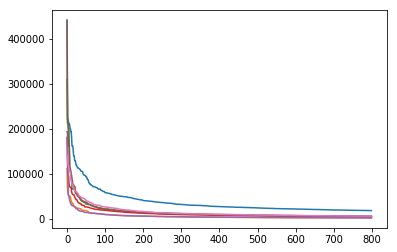

In [5]:
foo = ["", "all", "lifestyle", "entertainment", "business", "medical", "tech", "world"]
analysisDict = {}
def analyze(index):
    indexString = "/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/Index" + str(index)
    with open(indexString, 'rb') as f:
        analysisList = pickle.load(f)
    print()
    print()
    print()
    print()
    print("******************* ", foo[index])
    for i in range(0, 20):
        print(analysisList[i])
    plotList = []
    for i in range(0, 800):
        plotList.append(analysisList[i][1])
    plt.plot(plotList)
    analysisDict[index] = analysisList
    
for g in range(1, 8):
    analyze(g)

In [6]:
#Sum of frequency of all words in title 

def newColumnSetUp(index):
    #Title: A B C
    #F(A) = shares of A
    #Max = top word in All
    #MAX(F(A)/F(MAX), F(B)/F(MAX), F(C)/F(MAX))  
    #Do this for each channell
    #Put all of these in as new columns in my data
    with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/titles", 'rb') as f:
        readTitles = pickle.load(f)
        
    indexString = "Index" + str(index)
    with open(indexString, 'rb') as f:
        analysisDict = pickle.load(f)
    maxShareWord = analysisDict[0][1]
    newColumn = []
    searchDict = []
    for i in range(0, len(analysisDict)):
        searchDict.append(analysisDict[i][0])
    k = 0
    for title in readTitles:
        if index == 1 or (index == 2 and data[' data_channel_is_lifestyle'][k]) or (index == 3 and data[' data_channel_is_entertainment'][k]) or (index == 4 and data[' data_channel_is_bus'][k]) or (index == 5 and data[' data_channel_is_socmed'][k]) or (index == 6 and data[' data_channel_is_tech'][k]) or (index == 7 and data[' data_channel_is_world'][k]):
            titleShares = data[' shares'][k]
            split = title.split()
            calculatedVal = 0.0
            for word in split:
                indexOfWord = searchDict.index(word)
                if calculatedVal < analysisDict[indexOfWord][1]/maxShareWord - titleShares/maxShareWord:
                    calculatedVal = analysisDict[indexOfWord][1]/maxShareWord - titleShares/maxShareWord
            newColumn.append(calculatedVal) 
        else:
            newColumn.append(0)
        k = k + 1
    columnName = foo[index] + " word prediction"
    data[columnName] = newColumn
    


for g in range(1,8):
    newColumnSetUp(g)
    
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'wb') as f:
        pickle.dump(data, f)

KeyboardInterrupt: 

In [7]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


[0, 253380.73272842955, 2324513.6459992086, 11465763.375588948, 22795194.220630907, 35100393.17749626, 38951218.997881666, 39772905.58280997, 36302193.65507638, 26852740.94774916, 18455778.48180494, 13538419.255836515, 7356645.170689689, 3945947.96657857, 2705955.575, 1647057.5624999998, 803545.9724053725, 645547.7952380951, 668499.7999999999, 438618.8095238095, 177001.0, 171862.99999999997, 39411.5, 11348.0, 0, 5406.0, 24698.0, 1978.0, 27094.0, 5600.0, 0, 13400.0, 11200.0, 2762.0, 0, 17254.0, 0, 0, 0, 0]
[2324513.6459992086, 11465763.375588948, 22795194.220630907, 35100393.17749626, 38951218.997881666, 39772905.58280997, 36302193.65507638, 26852740.94774916, 18455778.48180494, 13538419.255836515, 7356645.170689689, 3945947.96657857, 2705955.575, 1647057.5624999998]
WORD COUNT ANALYSIS


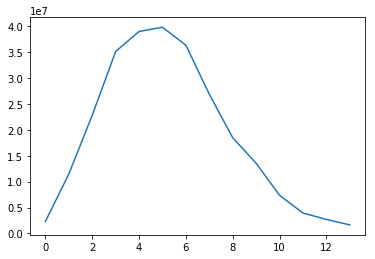

In [8]:
#########Size Of Word Analysis##########


wordLengthAnalysis = []
for v in range(0, 40):
    wordLengthAnalysis.append(0)

for i in range(1, 8):
    for word in analysisDict[i]:
        wordLengthAnalysis[len(word[0])] = wordLengthAnalysis[len(word[0])] + word[1]

print(wordLengthAnalysis)
    
removedOutliers = []
for i in range(0, len(wordLengthAnalysis)):
    if wordLengthAnalysis[i] > 1200000:
        removedOutliers.append(wordLengthAnalysis[i])
        
print(removedOutliers)
print("WORD COUNT ANALYSIS")
plt.plot(removedOutliers)



#########Size Of Word Analysis FINISHED#########

In [9]:
########MODEL TESTING###########

popular = data[' shares'] >= 1400
unpopular = data[' shares'] < 1400

data.loc[popular,' shares'] = 1
data.loc[unpopular,' shares'] = 0

#split original dataset into 60% training and 40% testing
features=list(data.columns[2:60])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(data[features], data[' shares'], test_size=0.2, random_state=0)

x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                            test_size=0.8, random_state=0)
print("DecisionTree on Original Data Set")
decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
clf_dt=decisionTree.fit(x_train,y_train)
score_dt=clf_dt.score(x_test_part,y_test_part)
print("Acurracy: ", score_dt)

print("RandomForest on Original Data Set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(x_train,y_train)
score_rf=clf_rf.score(x_test_part,y_test_part)
print("Acurracy: ", score_rf)

print("NaiveBayes on Original Data Set")
nb = BernoulliNB()
clf_nb=nb.fit(x_train,y_train)
score_nb=clf_nb.score(x_test_part,y_test_part)
print("Acurracy: ", score_nb)


print("DONE WITH ORIGINAL DATA")

DecisionTree on Original Data Set
Acurracy:  0.5898486759142497
RandomForest on Original Data Set
Acurracy:  0.6661412358133669
NaiveBayes on Original Data Set
Acurracy:  0.6216897856242118
DONE WITH ORIGINAL DATA


In [10]:
popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
indices = []
for i in range(2,68):
    if i != 60:
        indices.append(i)


features=list(newData.columns[indices])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.2, random_state=0)

x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                            test_size=0.8, random_state=0)

print("DecisionTree on New Data set")
decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
clf_dt=decisionTree.fit(x_train,y_train)
score_dt=clf_dt.score(x_test_part,y_test_part)
print("Acurracy: ", score_dt)

print("RandomForest on New Data set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(x_train,y_train)
score_rf=clf_rf.score(x_test_part,y_test_part)
print("Acurracy: ", score_rf)

print("NaiveBayes on New Data set")
nb = BernoulliNB()
clf_nb=nb.fit(x_train,y_train)
score_nb=clf_nb.score(x_test_part,y_test_part)
predict_nb = clf_nb.predict_proba(x_test_part)
print("Acurracy: ", score_nb)

print("DONE WITH NEW DATA")
##########MODEL TESTING FINISHED############

DecisionTree on New Data set
Acurracy:  0.7383354350567465
RandomForest on New Data set
Acurracy:  0.8020176544766708
NaiveBayes on New Data set
Acurracy:  0.7087011349306431
DONE WITH NEW DATA


In [89]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [90]:
##Part of Speech
##New feature for each part of speech and boolean of whether it has that part of speech or not.
import nltk as nltk
coordinatingConjunctions = []
cardinalDigits = []
determiners = []
existentialTheres = []
foreignWords = []
prepositions = []
bigAdjectives = []
biggerAdjectives = []
biggestAdjectives = []
listMarkers = []
modals = []
singleNouns = []
pluralNouns = []
properNouns = []
pluralProperNouns = []
predeterminers = []
possesives = []
personalPronouns = []
possesivePronouns = []
adverbs = []
comparitiveAdverbs = []
superlativeAdverbs = []
particles = []
toBe = []
interjections = []
verbs = []
gerundVerbs = []
pastVerbs = []
pastParticipleVerbs = []
presentVerbs = []
verbs3rdPerson = []
whDeterminers = []
whPronouns = []
whPossesives = []
whAdverbs = []

In [91]:
for title in readTitles:
    tokenized = nltk.word_tokenize(title)
    partsOfSpeech = nltk.pos_tag(tokenized)
    tokens = []
    for token in partsOfSpeech:
        tokens.append(token[1])
    if "CC" in tokens:
        coordinatingConjunctions.append(1)
    else:
        coordinatingConjunctions.append(0)
    if "CD" in tokens:
        cardinalDigits.append(1)
    else:
        cardinalDigits.append(0)
    if "DT" in tokens:
        determiners.append(1)
    else:
        determiners.append(0)
    if "EX" in tokens:
        existentialTheres.append(1)
    else:
        existentialTheres.append(0)
    if "FW" in tokens:
        foreignWords.append(1)
    else:
        foreignWords.append(0)
    if "IN" in tokens:
        prepositions.append(1)
    else:
        prepositions.append(0)
    if "JJ" in tokens:
        bigAdjectives.append(1)
    else:
        bigAdjectives.append(0)
    if "JJR" in tokens:
        biggerAdjectives.append(1)
    else:
        biggerAdjectives.append(0)
    if "JJS" in tokens:
        biggestAdjectives.append(1)
    else:
        biggestAdjectives.append(0)
    if "LS" in tokens:
        listMarkers.append(1)
    else:
        listMarkers.append(0)
    if "MD" in tokens:
        modals.append(1)
    else:
        modals.append(0)
    if "NN" in tokens:
        singleNouns.append(1)
    else:
        singleNouns.append(0)
    if "NNS" in tokens:
        pluralNouns.append(1)
    else:
        pluralNouns.append(0)
    if "NNP" in tokens:
        properNouns.append(1)
    else:
        properNouns.append(0)
    if "NNPS" in tokens:
        pluralProperNouns.append(1)
    else:
        pluralProperNouns.append(0)
    if "PDT" in tokens:
        predeterminers.append(1)
    else:
        predeterminers.append(0)
    if "POS" in tokens:
        possesives.append(1)
    else:
        possesives.append(0)
    if "PRP" in tokens:
        personalPronouns.append(1)
    else:
        personalPronouns.append(0)
    if "PRP$" in tokens:
        possesivePronouns.append(1)
    else:
        possesivePronouns.append(0)
    if "RB" in tokens:
        adverbs.append(1)
    else:
        adverbs.append(0)
    if "RBR" in tokens:
        comparitiveAdverbs.append(1)
    else:
        comparitiveAdverbs.append(0)
    if "RBS" in tokens:
        superlativeAdverbs.append(1)
    else:
        superlativeAdverbs.append(0)
    if "RP" in tokens:
        particles.append(1)
    else:
        particles.append(0)
    if "TO" in tokens:
        toBe.append(1)
    else:
        toBe.append(0)
    if "UH" in tokens:
        interjections.append(1)
    else:
        interjections.append(0)
    if "VB" in tokens:
        verbs.append(1)
    else:
        verbs.append(0)
    if "VBD" in tokens:
        pastVerbs.append(1)
    else:
        pastVerbs.append(0)
    if "VBG" in tokens:
        gerundVerbs.append(1)
    else:
        gerundVerbs.append(0)
    if "VBN" in tokens:
        pastParticipleVerbs.append(1)
    else:
        pastParticipleVerbs.append(0)
    if "VBP" in tokens:
        presentVerbs.append(1)
    else:
        presentVerbs.append(0)
    if "VBZ" in tokens:
        verbs3rdPerson.append(1)
    else:
        verbs3rdPerson.append(0)
    if "WDT" in tokens:
        whDeterminers.append(1)
    else:
        whDeterminers.append(0)
    if "WP" in tokens:
        whPronouns.append(1)
    else:
        whPronouns.append(0)
    if "WP$" in tokens:
        whPossesives.append(1)
    else:
        whPossesives.append(0)
    if "WRB" in tokens:
        whAdverbs.append(1)
    else:
        whAdverbs.append(0)
print(len(whAdverbs))

39644


In [92]:
columnName = "coordinatingConjunctions"
newData[columnName] = coordinatingConjunctions
columnName = "cardinalDigits"
newData[columnName] = cardinalDigits
columnName = "determiners"
newData[columnName] = determiners
columnName = "existentialTheres"
newData[columnName] = existentialTheres
columnName = "foreignWords"
newData[columnName] = foreignWords
columnName = "prepositions"
newData[columnName] = prepositions
columnName = "bigAdjectives"
newData[columnName] = bigAdjectives
columnName = "biggerAdjectives"
newData[columnName] = biggerAdjectives
columnName = "biggestAdjectives"
newData[columnName] = biggestAdjectives
columnName = "listMarkers"
newData[columnName] = listMarkers
columnName = "modals"
newData[columnName] = modals
columnName = "singleNouns"
newData[columnName] = singleNouns
columnName = "pluralNouns"
newData[columnName] = pluralNouns
columnName = "properNouns"
newData[columnName] = properNouns
columnName = "pluralProperNouns"
newData[columnName] = pluralProperNouns
columnName = "predeterminers"
newData[columnName] = predeterminers
columnName = "possesives"
newData[columnName] = possesives
columnName = "personalPronouns"
newData[columnName] = personalPronouns
columnName = "possesivePronouns"
newData[columnName] = possesivePronouns
columnName = "adverbs"
newData[columnName] = adverbs
columnName = "comparitiveAdverbs"
newData[columnName] = comparitiveAdverbs
columnName = "superlativeAdverbs"
newData[columnName] = superlativeAdverbs
columnName = "particles"
newData[columnName] = particles
columnName = "toBe"
newData[columnName] = toBe
columnName = "interjections"
newData[columnName] = interjections
columnName = "verbs"
newData[columnName] = verbs
columnName = "gerundVerbs"
newData[columnName] = gerundVerbs
columnName = "pastVerbs"
newData[columnName] = pastVerbs
columnName = "presentVerbs"
newData[columnName] = presentVerbs
columnName = "verbs3rdPerson"
newData[columnName] = verbs3rdPerson
columnName = "whDeterminers"
newData[columnName] = whDeterminers
columnName = "whPronouns"
newData[columnName] = whPronouns
columnName = "whPossesives"
newData[columnName] = whPossesives
columnName = "whAdverbs"
newData[columnName] = whAdverbs
##Is title a question?####
newColumn = []
for title in readTitles:
    if '?' in title:
        newColumn.append(1)
    else:
        newColumn.append(0)
columnName = "IsItAQuestion?"
newData[columnName] = newColumn

In [93]:
popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
print(len(newData.columns))
indices = []
for i in range(2,103):
    if i != 60:
        indices.append(i)


features=list(newData.columns[indices])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.2, random_state=0)

x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                            test_size=0.8, random_state=0)

print("DecisionTree on New Data set")
decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
clf_dt=decisionTree.fit(x_train,y_train)
score_dt=clf_dt.score(x_test_part,y_test_part)
print("Acurracy: ", score_dt)

print("RandomForest on New Data set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(x_train,y_train)
score_rf=clf_rf.score(x_test_part,y_test_part)
print("Acurracy: ", score_rf)

print("NaiveBayes on New Data set")
nb = BernoulliNB()
clf_nb=nb.fit(x_train,y_train)
score_nb=clf_nb.score(x_test_part,y_test_part)
predict_nb = clf_nb.predict_proba(x_test_part)
print("Acurracy: ", score_nb)

print("DONE WITH PART OF SPEECH DATA")
##########MODEL TESTING FINISHED############

103
DecisionTree on New Data set
Acurracy:  0.7490542244640606
RandomForest on New Data set
Acurracy:  0.794609079445145
NaiveBayes on New Data set
Acurracy:  0.7091740226986128
DONE WITH QUESTION DATA


In [94]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [14]:
##Word Embeddings################
from gensim.models import Word2Vec
import numpy as np

sentences = []
for title in readTitles:
    newSentence = []
    for word in title.split():
        newSentence.append(word)
    sentences.append(newSentence)

print(sentences[0])
print(len(sentences))

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


["Amazon's", 'Streaming', 'Video', 'Library', 'Now', 'a', 'Little', 'Easier', 'to', 'Navigate']
39644


In [15]:
model = Word2Vec(sentences, min_count=1)
print(model)
words = list(model.wv.vocab)
# print(words)
print(model['Streaming'])

Word2Vec(vocab=44258, size=100, alpha=0.025)
[ 4.2999703e-01  3.4195646e-03  1.0399203e-01  3.0736920e-01
 -9.4246693e-02 -4.8652238e-01  1.7214558e-01  7.8627206e-02
  2.3584481e-01  4.2623484e-01  4.6671722e-03 -1.4904545e-01
 -1.1903861e-01  1.3683590e-01 -1.8933013e-01 -2.6419756e-01
 -3.1446232e-03  7.4774906e-02 -6.1343495e-02 -2.5463608e-01
 -2.2843708e-01 -1.7884819e-02 -2.9180905e-02  1.7184708e-01
 -2.0786409e-01 -2.1524860e-01  2.3018727e-01  3.8193271e-01
 -4.4238141e-01 -1.1214444e-01 -4.6248320e-01  2.7054104e-01
  7.1032681e-02  3.1988412e-01  4.2588085e-01 -1.8719803e-01
 -6.6824883e-02 -3.9252961e-01 -3.1697196e-01  7.3955083e-01
 -3.3085287e-02  4.8536232e-01  8.8841878e-02  5.0306249e-01
  2.2242096e-01  3.5672337e-01  7.6669335e-02  1.9793336e-01
 -2.4931112e-01  2.7840480e-01  3.5696152e-01  2.8668547e-01
 -2.3957185e-01  2.8183853e-02  4.9148464e-01 -4.2080685e-02
  4.2531142e-01  6.5066382e-02 -2.0661306e-01  2.1525325e-01
  4.4500142e-01 -3.4524140e-01  2.361256

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [24]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [25]:
#sum all vectors of words in each title divide by number of words take all values in vector and add each to new feature
#adding vectors is simple addition and divison
newVectors = []
for title in readTitles:
    newVector = []
    for i in range(0,100):
        sum = 0;
        for word in title.split():
            sum = sum + model[word][i]
        newVector.append(sum/len(title.split()))
    newVectors.append(newVector)
print("DONE MAKING VECTORS")

for colIndex in range(0,100):
    newColumn = []
    columnName = "WordEmbeddings"+str(colIndex)
    for vector in newVectors: 
        newColumn.append(vector[i])
    newData[columnName] = newColumn
    
print(newData["WordEmbeddings35"])
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/WORDEMBEDDINGSCSV", 'wb') as f:
        pickle.dump(newData, f)
# print(data[columnName][10])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


DONE MAKING VECTORS
0        1.332921
1        1.065858
2        1.152016
3        1.062138
4        1.678733
5        1.287770
6        1.014496
7        1.329845
8        1.113052
9        0.714402
10       1.217638
11       1.106902
12       1.169026
13       1.043718
14       0.825804
15       1.043511
16       1.393155
17       1.648827
18       1.767174
19       1.264365
20       1.424109
21       0.841514
22       0.880708
23       1.003299
24       0.963473
25       0.861845
26       0.751589
27       1.303188
28       1.491069
29       1.562652
           ...   
39614    1.334344
39615    1.171760
39616    0.839236
39617    0.997607
39618    0.252992
39619    0.696602
39620    0.788098
39621    0.559012
39622    1.142261
39623    1.432219
39624    0.400884
39625    0.721807
39626    1.010904
39627    0.474878
39628    1.010799
39629    0.575837
39630    0.779899
39631    0.869126
39632    0.772926
39633    0.916341
39634    0.946871
39635    0.919346
39636    0.799013
39637   

In [26]:
popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
print(len(newData.columns))
indices = []
for i in range(2,len(newData.columns)):
    if i != 60:
        indices.append(i)


features=list(newData.columns[indices])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.2, random_state=0)

x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                            test_size=0.8, random_state=0)

print("DecisionTree on New Data set")
decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
clf_dt=decisionTree.fit(x_train,y_train)
score_dt=clf_dt.score(x_test_part,y_test_part)
print("Acurracy: ", score_dt)

print("RandomForest on New Data set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(x_train,y_train)
score_rf=clf_rf.score(x_test_part,y_test_part)
print("Acurracy: ", score_rf)

print("NaiveBayes on New Data set")
nb = BernoulliNB()
clf_nb=nb.fit(x_train,y_train)
score_nb=clf_nb.score(x_test_part,y_test_part)
predict_nb = clf_nb.predict_proba(x_test_part)
print("Acurracy: ", score_nb)

print("DONE WITH NEW DATA")
##########MODEL TESTING FINISHED############

168
DecisionTree on New Data set
Acurracy:  0.7432219419924337
RandomForest on New Data set
Acurracy:  0.7916141235813366
NaiveBayes on New Data set
Acurracy:  0.7085435056746532
DONE WITH NEW DATA
